# SEPSIS PREDICTION MODEL 

Import the necessary libraries and packages used.

In [25]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

Here the platform i used was Kaggle as it provides free GPU along with 16 GB RAM.

In [26]:
trainA = '/kaggle/input/physionet-challenge-2019early-detection-of-sepsis/training_setA/training'
print('training setA have {} files'.format(len(os.listdir(trainA))))
trainB = '/kaggle/input/physionet-challenge-2019early-detection-of-sepsis/training_setB/training_setB'
print('training setA have {} files'.format(len(os.listdir(trainB))))

training setA have 20336 files
training setA have 20000 files


In [27]:
os.chdir('/kaggle/input/physionet-challenge-2019early-detection-of-sepsis/training_setB/training_setB')
extension ='psv'
filenames = [i for i in glob.glob('*{}'.format(extension))]

Extract data from each files in the Training A folder of our dataset. Patience is important parameter here(lol !), as we are extracting and concatinating data from 20,000 files on the go.

In [28]:
trainn = pd.concat([pd.read_csv(f , sep='|') for f in filenames])
trainn.to_csv('trainn.csv', index=False)

OSError: [Errno 30] Read-only file system: 'trainn.csv'

Save the data extracted in to a new file called 'trainn' and check whether you are doing right! Also, check for missing values!

In [29]:
trainn.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,1,0
1,76.0,100.0,NaN,109.0,63.0,47.0,NaN,34.0,NaN,NaN,...,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,2,0
2,75.0,100.0,37.4,111.5,64.5,47.5,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,3,0
3,73.0,100.0,NaN,105.0,63.0,46.0,NaN,37.0,NaN,NaN,...,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,4,0
4,76.0,100.0,NaN,130.0,74.0,53.0,NaN,38.0,NaN,NaN,...,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,5,0


In [30]:
trainn.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [31]:
a,b = trainn.shape
x   = trainn.size
if ( a*b!= x):
    print('There is missing values! Clean it!')
else:
    print('There is no missing values! Yet there may be NAN values.')       

There is no missing values! Yet there may be NAN values.


In [32]:
print('The dimensions of the given Training A dataset is:',trainn.shape)
print('The total number of data in given Training A dataset is',trainn.size)

The dimensions of the given Training A dataset is: (761995, 41)
The total number of data in given Training A dataset is 31241795


0    751215
1     10780
Name: SepsisLabel, dtype: int64

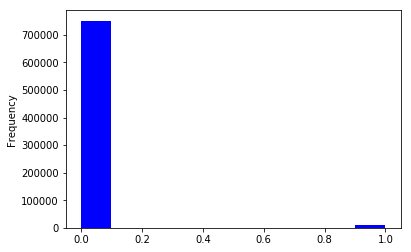

In [33]:
trainn.SepsisLabel.plot.hist( color = "b")
trainn['SepsisLabel'].value_counts()

Look out for the features that give us best Correlation with Target variable(SepsisLabel)
Hence, let us use seaborn to check out our best correlation b\w features with target feature.

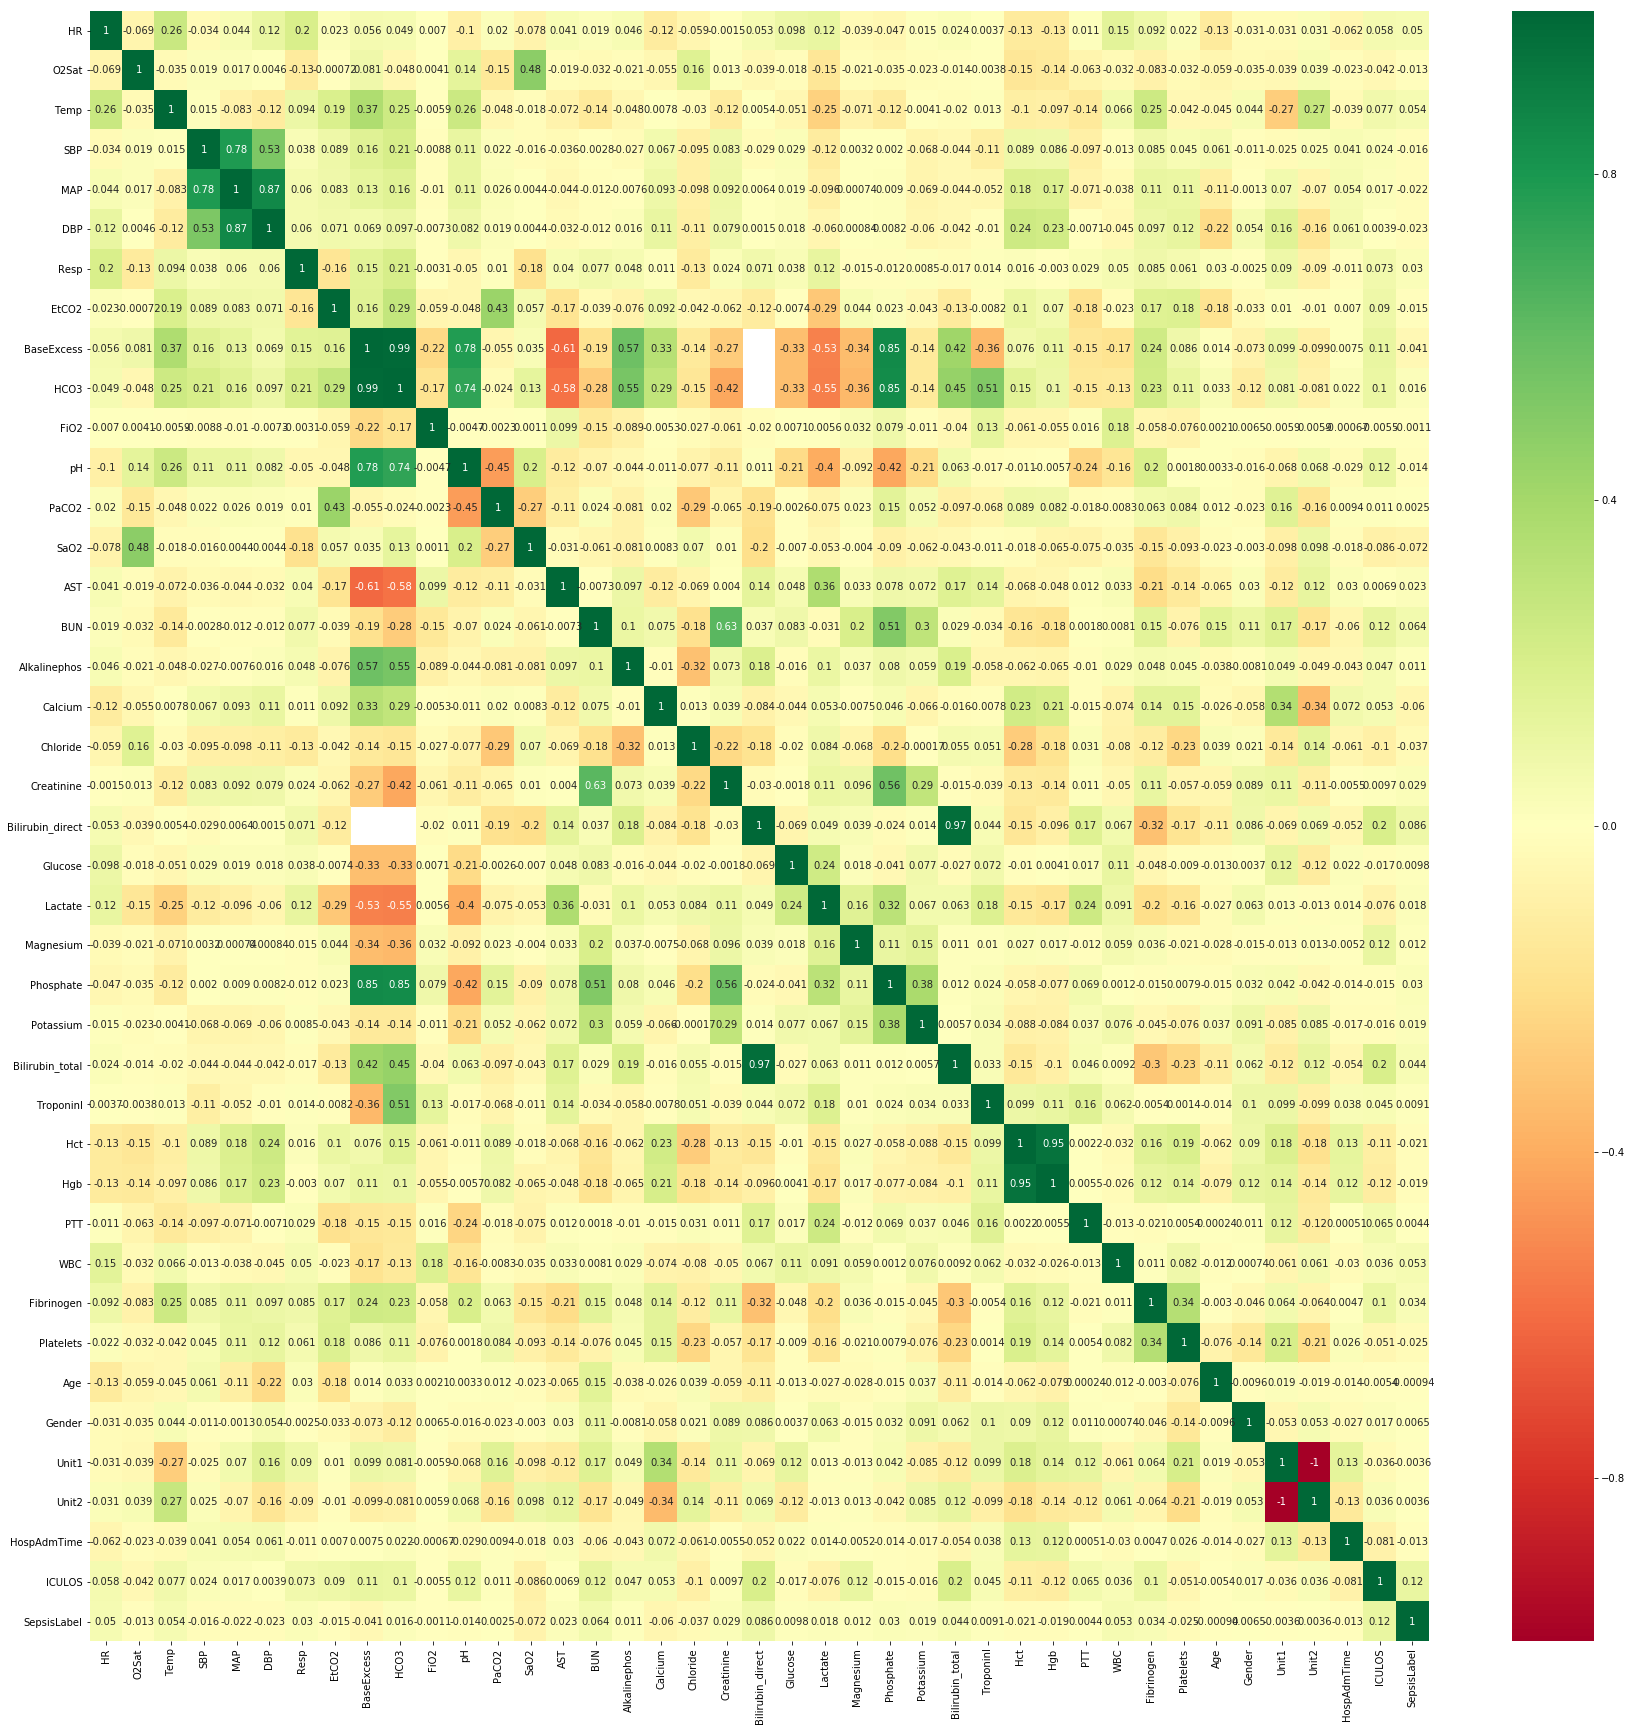

In [34]:
corrmat = trainn.corr()
top = corrmat.index
plt.figure(figsize=(30,30))
g = sns.heatmap(trainn[top].corr(), annot= True, cmap ="RdYlGn")

Chose your Independent features and Target variable and eliminate unwanted features.

In [35]:
features = trainn.drop(columns =['SepsisLabel','PaCO2','SBP','MAP','DBP','SaO2','Potassium','Lactate','Glucose','AST','TroponinI','Hct', 'Hgb'])
features.head()

,HR,O2Sat,Temp,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,BUN,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,1
1,76.0,100.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,2
2,75.0,100.0,37.4,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,3
3,73.0,100.0,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,4
4,76.0,100.0,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76,0,0.0,1.0,-75.83,5


In [36]:
print(features.shape)
print(features.size)

(761995, 28)
21335860


In [37]:
training_features, testing_features, training_target, testing_target = train_test_split(features, trainn['SepsisLabel'],train_size=0.80, test_size=0.20)
training_features.shape, testing_features.shape, training_target.shape, testing_target.shape

((609596, 28), (152399, 28), (609596,), (152399,))

This dataset has many NAN values, so let's impute the missing values

In [38]:
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

It is unbelievably a large dataset to be handled by this platform. 

In [39]:
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesClassifier( n_estimators=100, criterion="entropy", max_features="auto", min_samples_leaf=1, min_samples_split=5)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

Stricitly make use of GPU's to train your model. I used Kaggle Kernels to train my models.

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_target,results)
cm

array([[150280,     41],
       [  1581,    497]])

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_target,results)
accuracy

0.9893568855438684

In [61]:
tn, fp, fn, tp = confusion_matrix(testing_target,results).ravel()
print(tn, fp, fn, tp)  

150280 41 1581 497


In [ ]:
testing_target.value_counts()

In [57]:
from sklearn.metrics import precision_score
precision_score(testing_target,results)

0.9237918215613383

In [58]:
from sklearn.metrics import recall_score
recall_score(testing_target,results)

0.23917228103946103